In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Q7 a

In [109]:
data = pd.read_excel('CPALTT01USM661S.xlsx', sheet_name='Monthly')
data.rename(columns={'CPALTT01USM661S': 'Index'}, inplace=True)
data.set_index('observation_date', inplace=True)
data.head(4)

,Index
observation_date,
1980-01-01,32.90903
1980-02-01,33.33094
1980-03-01,33.79504
1980-04-01,34.13257


# Q7 a

First few values of inflation (growth rates):
                     Index   Log_CPI  Inflation
observation_date                               
1980-01-01        32.90903  3.493747        NaN
1980-02-01        33.33094  3.506486   0.012739
1980-03-01        33.79504  3.520314   0.013828
1980-04-01        34.13257  3.530252   0.009938
1980-05-01        34.47010  3.540092   0.009840
1980-06-01        34.80763  3.549837   0.009744
1980-07-01        34.84982  3.551048   0.001211
1980-08-01        35.10297  3.558286   0.007238
1980-09-01        35.39830  3.566664   0.008378
1980-10-01        35.73583  3.576154   0.009490


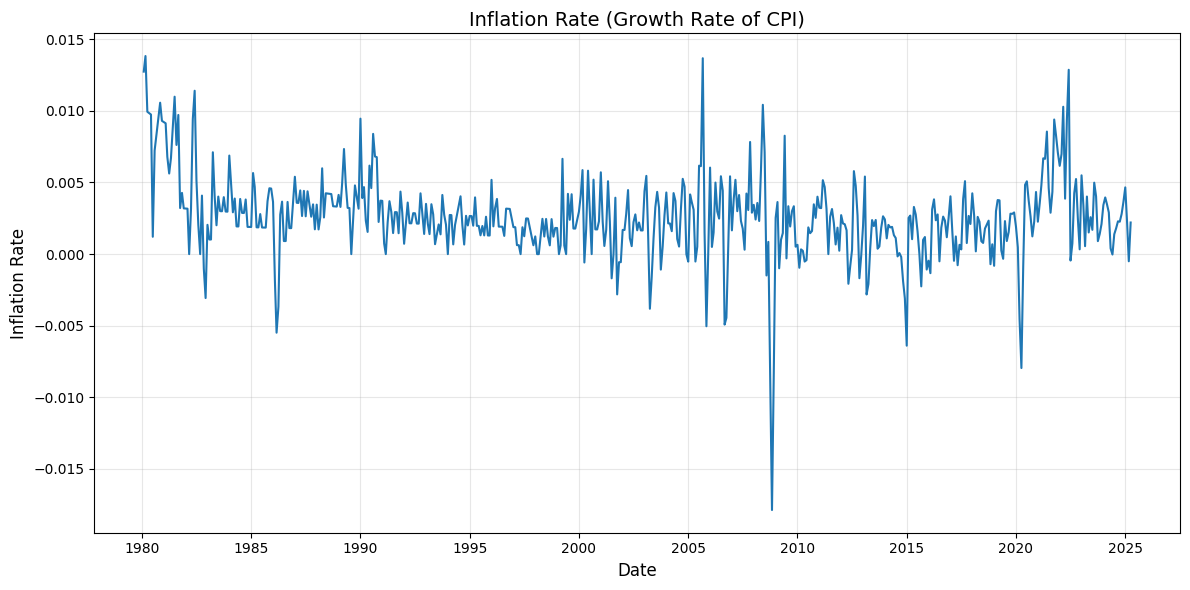

In [110]:
# Take the log of the CPI series
log_cpi = np.log(data["Index"])

# Take the first difference to create growth rates (inflation)
# g_t = ln(CPI_t) - ln(CPI_{t-1})
inflation = log_cpi.diff()

# Store in the dataframe
data["Log_CPI"] = log_cpi
data["Inflation"] = inflation

# Display first few values
print("First few values of inflation (growth rates):")
print(data[["Index", "Log_CPI", "Inflation"]].head(10))

# Plot the inflation series
plt.figure(figsize=(12, 6))
plt.plot(data["Inflation"])
plt.title("Inflation Rate (Growth Rate of CPI)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Inflation Rate", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This data looks fairly stationary with clear spikes around 2008 and 2020.

# Q7 b

In [111]:
data = data.dropna()
data.head(2)

,Index,Log_CPI,Inflation
observation_date,,,
1980-02-01,33.33094,3.506486,0.012739
1980-03-01,33.79504,3.520314,0.013828


<Figure size 1200x600 with 0 Axes>

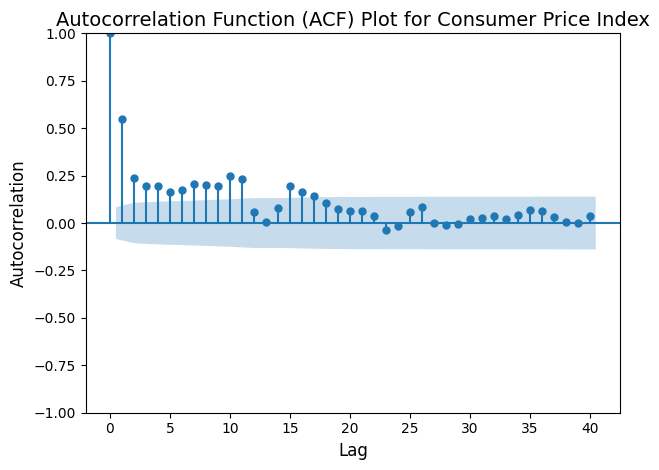

In [112]:
# Construct an ACF plot for the data above
plt.figure(figsize=(12, 6))
plot_acf(data['Inflation'], lags=40)
plt.title('Autocorrelation Function (ACF) Plot for Consumer Price Index', fontsize=14)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.tight_layout()
plt.show()

Yes, there is early autocorrelation in this data which presists seasonally (12 month).

# Q7 c

/Users/olegglotov/Documents/CHICAGO code/Winter/FINM - Time Series/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/olegglotov/Documents/CHICAGO code/Winter/FINM - Time Series/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/olegglotov/Documents/CHICAGO code/Winter/FINM - Time Series/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/olegglotov/Documents/CHICAGO code/Winter/FINM - Time Series/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

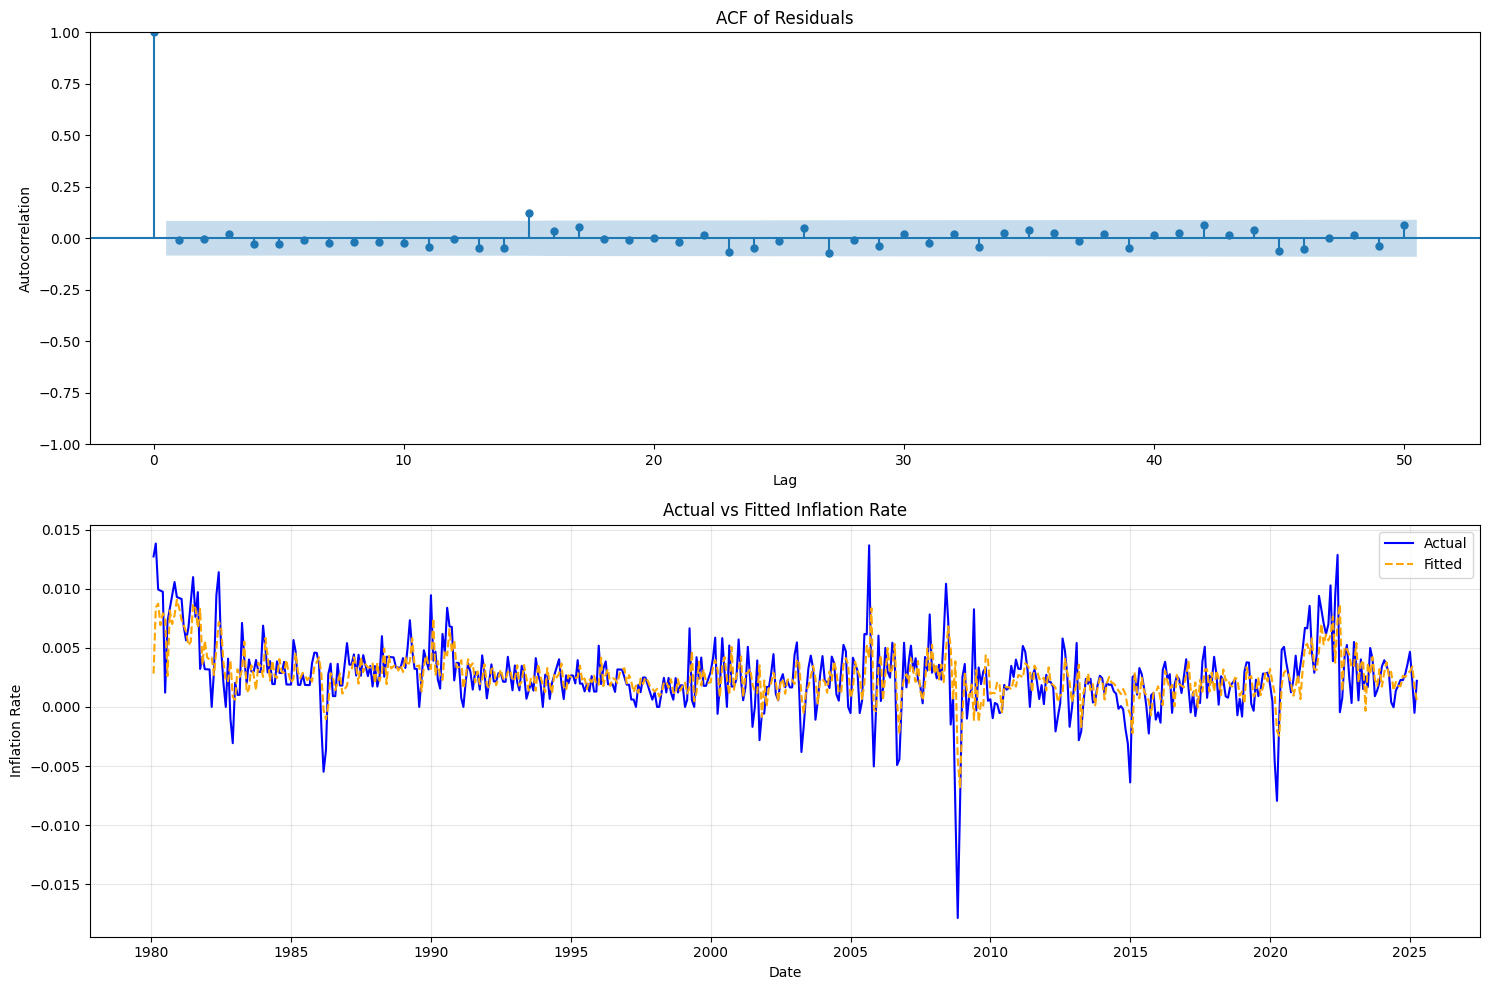

step: 1 acf: -0.00977259431391876
step: 2 acf: -0.0021077338404132473
step: 3 acf: 0.01948332931244896
step: 4 acf: -0.026882780485939197
step: 13 acf: -0.04793527901893195
step: 14 acf: -0.049116215384615594
step: 15 acf: 0.12484265709845116
step: 16 acf: 0.033743103906583485
step: 17 acf: 0.05285856585570968


In [118]:
# Fit ARIMA(1,0,0) model
model = ARIMA(data["Inflation"], order=(12, 0, 1))
fitted_model = model.fit()

# Get fitted values and residuals
fitted_values = fitted_model.fittedvalues
residuals = fitted_model.resid

# Plot 1: Residuals ACF and Actual vs Fitted values
fig, axes = plt.subplots(2, figsize=(15, 10))

# Residuals ACF
plot_acf(residuals, lags=50, ax=axes[0], title='ACF of Residuals')
residuals_acf = acf(residuals, nlags=48, fft=False)
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Autocorrelation')

# Actual vs Fitted plot
axes[1].plot(data.index, data["Inflation"], label="Actual", color='blue')
axes[1].plot(fitted_values.index, fitted_values, label="Fitted", color='orange', linestyle='--')
axes[1].set_title('Actual vs Fitted Inflation Rate')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Inflation Rate')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

xs = list(range(1, 5)) + list(range(13, 18))
for x in xs:
    print("step:" , x , "acf:" , residuals_acf[x])

At first glance an AR(1) model seems sufficient for this data. For a better fit to eliminate some insignificant spikes I would use a ARMA(12,1) model.

# Q7 d

In [114]:
# Roots
ar_roots = fitted_model.arroots
ar_roots

array([-1.12343508-0.30957631j, -1.12343508+0.30957631j,
       -0.80073488-0.83413193j, -0.80073488+0.83413193j,
       -0.21516121-1.09311785j, -0.21516121+1.09311785j,
        0.39163807-1.07249688j,  0.39163807+1.07249688j,
        0.895318  -0.70413324j,  0.895318  +0.70413324j,
        1.07429245-0.j        ,  1.76585854-0.j        ])

In [115]:
# Abs of roots
modulus = []
for i, root in enumerate(ar_roots, 1):
    modulus.append(np.abs(root))
modulus


[np.float64(1.1653084874633557),
 np.float64(1.1653084874633557),
 np.float64(1.1562665943671575),
 np.float64(1.1562665943671575),
 np.float64(1.1140919971095353),
 np.float64(1.1140919971095353),
 np.float64(1.141766147839997),
 np.float64(1.141766147839997),
 np.float64(1.1390337778019375),
 np.float64(1.1390337778019375),
 np.float64(1.0742924473290953),
 np.float64(1.7658585373722713)]

Given the above calculation, all roots lie outside the unit circle meaning the system is stable in the long term (stationary). As the closest root dominates long run behaviour and is 1.087 the shocks will decay slowly. Taking the inverse of this will would show the decay rate.